In [1]:
import os
import sys
path = '../'
sys.path.insert(1, '{0}/pkg/'.format(path))
import memnet_utils as utils
import matplotlib.pyplot as plt
import warnings
import tqdm
import pickle
import torch
import full_network as network
import numpy as np
warnings.filterwarnings("ignore")

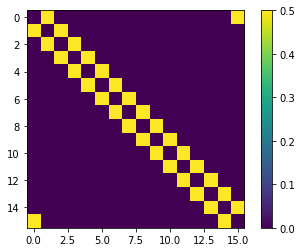

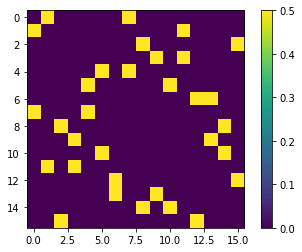

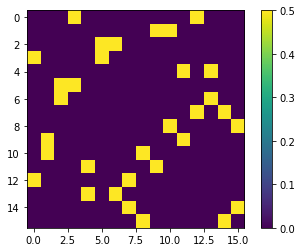

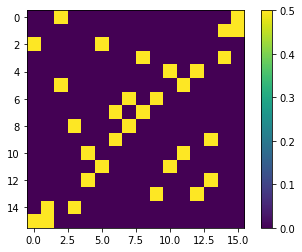

change points:
(0, 0) (3401, 3) (4732, 2) (6998, 1) 

In [2]:
## create N + 1 mazes with following params## 
# This cell is just an example of different mazes and change points
number_rooms = 16
n_moves = 1
n_maze = 4
volatility = 0.001
epochs = 10000
deter_start =None
simulation = utils.create_simulation(epochs = epochs, number_rooms = number_rooms, volatility = volatility
                                     , n_moves = n_moves, n_maze = n_maze, seed  = 45, Dirichlet = 0,deter_start = deter_start,symmetric = True)
for i in range(len(simulation['transitions'])):
    plt.imshow(simulation['transitions'][i])
    plt.colorbar()
    plt.show()
print('change points:')
for key, value in sorted(simulation['change_points'].items()):
    print((key,value), end =" ")


Simulation 1
change points:
(0, 0) (2551, 3) (4034, 0) (8235, 2) 
---Network parameters---
batch_size: 1
------------------------
fasnet_module :
   EI_neurons: 128
   eta1: 0.0008007308801909167
   eta2: 0.02
   FB_inhib: 40
   input_neurons: 128
   l: 4
   modulation: full
   N: 10
   number_rooms: 16
   plot: True
   Poisson_rate: 0.1
   Poisson_rate_error: 0
   random_projection: False
   tau: 10
   theta: 0.3250994956925643
   W: None
------------------------
n_memory: 5
------------------------
plot: True
------------------------
print: True
------------------------
selector_module :
   alpha_p: 1e-06
   beta: 0.11
   external_current: 1
   input_shape: 128
   l: 4
   lr_msp: 0.6
   module_inhib: 20
   msp_neurons: 20
   plot: True
   r: 2
   self_inhib: 4
   tau: 10
   wta_speed: 0.05
------------------------
T_pres: 100
------------------------
############### Simulation  N° 1!! ###############
941986147


  0%|          | 0/10000 [00:00<?, ?it/s]

Simulation N 1: Epoch 0 -> Moving to maze 0


  0%|          | 1/10000 [00:00<1:09:41,  2.39it/s]

plotting
----- Plot Fasnet Module:-----


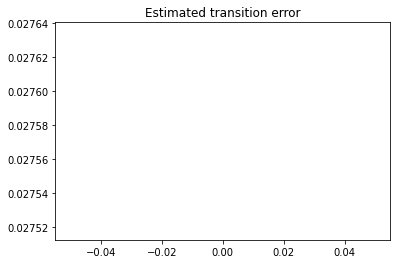

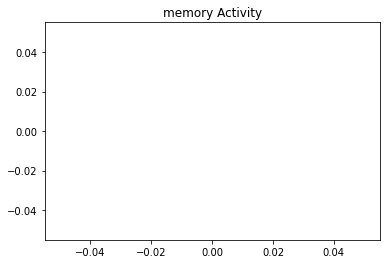

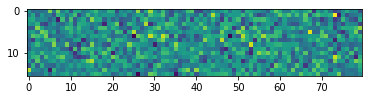

---------Selector Network---------
---First layer spikes----


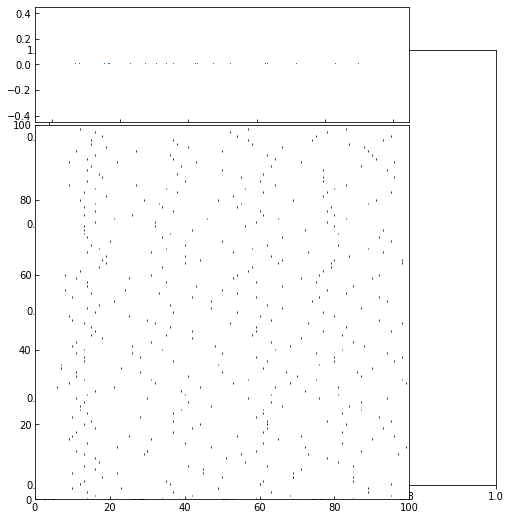

---Second layer spikes----


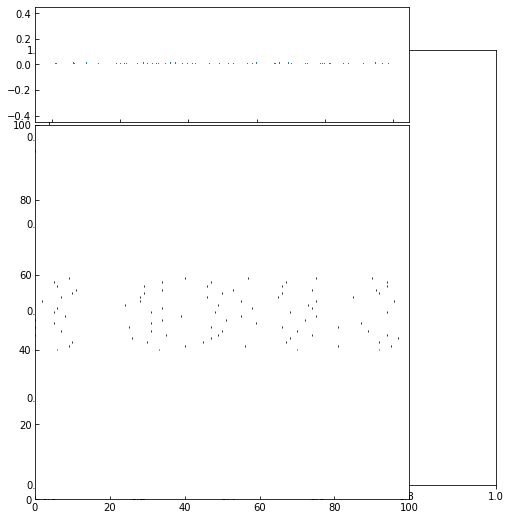

---Commitment matrix----


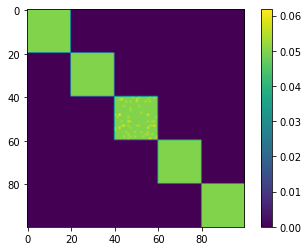

  0%|          | 2/10000 [00:05<4:54:10,  1.77s/it]

Simulation N 1 : Change-point detected. Activating memory :  2
First maze encounter and memory never used


  2%|▏         | 203/10000 [01:29<1:03:28,  2.57it/s]

In [ ]:
with open('params_network.pkl', 'rb') as f:
        params= pickle.load(f)
infos = []
batch_size = 1
volatility = 0.001
simulations = []
with torch.no_grad():
    for i in range(batch_size):
        print('Simulation {0}'.format(i+1))
        seed = round(2**32 * np.random.rand() - 1)
        simulations += [utils.create_simulation(epochs = epochs, number_rooms = number_rooms, volatility = volatility
         , n_moves = n_moves, n_maze = n_maze, seed  = seed, Dirichlet = 0,deter_start = deter_start,symmetric = True)]
        print('change points:')
        for key, value in sorted(simulations[i]['change_points'].items()):
            print((key,value), end =" ")
        print()

    # Plot parameters. Note there is no plot if batch_size > 1
    params['plot'] = True
    params['fasnet_module']['plot'] = True
    params['print'] = True
    params['batch_size'] = batch_size

    # Network parameters set for solution of 2 transitions
    params['n_memory'] = 5
    params['fasnet_module']['eta1'] = 0.0008007308801909167
    params['fasnet_module']['eta2'] =  0.02
    params['fasnet_module']['theta'] = 0.3250994956925643
    params['selector_module']["msp_neurons"] = 20
    params['selector_module']['beta'] = 0.11
    params['selector_module']['r'] = 2
    params['selector_module']['self_inhib'] = 4
    params['selector_module']['module_inhib'] = 20
    params['selector_module']['wta_speed'] = 0.05
    params['selector_module']['lr_msp'] = .6
    utils.nice_print(params)

    # Initialisation of the simulations
    print('############### Simulation  N° {0}!! ###############'.format(i+1))
    seed = round(2**32 * np.random.rand() - 1)
    print(seed)

    # Running simulation
    net = network.MemNet(params)
    criteria = network.full_simulation(simulations,net)
    
    # Save and print results
    torch.save(criteria,'../results/criteria_move_1_H_{0}'.format(volatility))
    print('number of succes:', round(100 * torch.mean(torch.Tensor([1-criteria[i]['stop'] for i in range(batch_size)])).item() ,2))
